# Assignment 14 KNN.
## Dataset :- Zoo
### Quick info. about KNN.
### Info :-
The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
similar data poAdvantages
The algorithm is simple and easy to implement.
There’s no need to build a model, tune several parameters, or make additional assumptions.
ints are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.
#### Advantages
The algorithm is simple and easy to implement.
There’s no need to build a model, tune several parameters, or make additional assumptions.
The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).
#### Disadvantages
The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.
#### For further more info.about KNN visit link below :-
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
https://www.kdnuggets.com/2020/04/introduction-k-nearest-neighbour-algorithm-using-examples.html

In [1]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Data Loading 

In [2]:
Zoo01 = pd.read_csv("D:\Data Science Material\Assignments\KNN\Zoo.csv")

In [3]:
Zoo01.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Exploring data set more

In [4]:
# some mathematical measures

Zoo01.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
# lets explore about the data types, null cols, dataset length, rows and columns

Zoo01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
Zoo01.shape

(101, 18)

#### Data Analysis

In [7]:
# finding NA values

Zoo01.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

No NA values in dataset 

In [8]:
Zoo01

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
Zoo01['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [10]:
Zoo01.legs.value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [11]:
Zoo01.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [12]:
Zoo01.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [40]:
Zoo = Zoo01.copy()

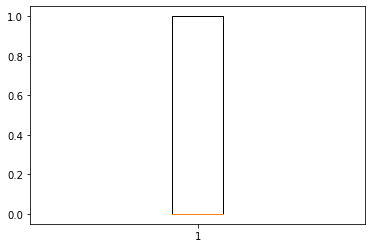

In [14]:
## boxplot

plt.boxplot(Zoo.hair , vert = True)
plt.show()

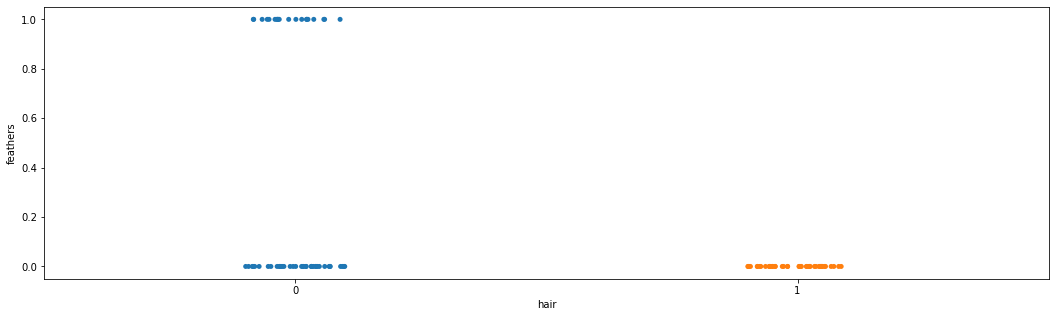

In [15]:
plt.figure(figsize = (18,5))
sns.stripplot(x = 'hair',y = 'feathers', data = Zoo)
plt.show()

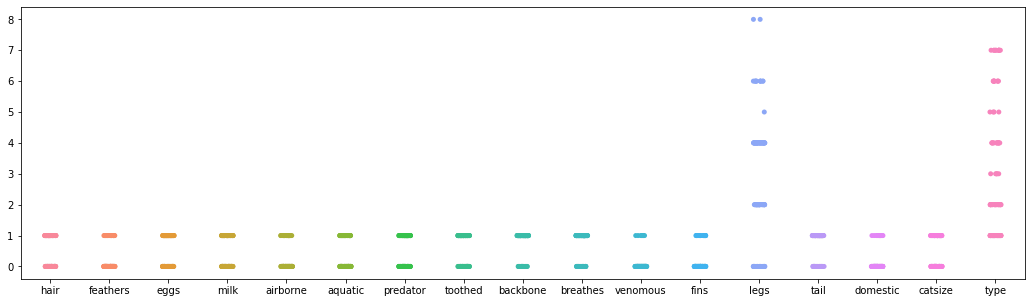

In [16]:
plt.figure(figsize = (18,5))
sns.stripplot(data = Zoo)
plt.show()

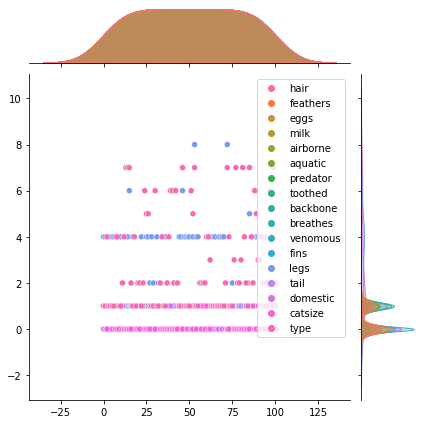

In [17]:
# Join plot

#plt.figure(figsize = (20,10))
sns.jointplot(data = Zoo)
plt.show()

Here our data is soo clean and and in the form of boolean values we not need to clean it ..

#### Building the model

In [41]:
Zoo.drop(['animal name'],inplace = True,axis = 1)

In [42]:
Zoo.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [32]:
# train test split

from sklearn.model_selection import train_test_split

X = Zoo.iloc[:,:-1]
y = Zoo['type']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 40)

In [33]:
X.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tortoise,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [35]:
X_train.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tortoise,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm
hair,1.000000,-0.413178,-0.894668,0.894668,-0.287735,-0.493039,-0.105727,0.544689,0.231279,0.428571,...,-0.089489,-0.089489,-0.089489,NaN,0.141450,-0.089489,0.141450,0.141450,0.141450,-0.089489
feathers,-0.413178,1.000000,0.413178,-0.413178,0.701214,-0.137457,-0.082918,-0.636209,0.239247,0.279895,...,-0.058444,-0.058444,-0.058444,NaN,-0.058444,0.216587,-0.058444,-0.058444,-0.058444,-0.058444
eggs,-0.894668,0.413178,1.000000,-1.000000,0.413178,0.386292,0.002579,-0.649437,-0.366332,-0.428571,...,0.089489,0.089489,0.089489,NaN,-0.141450,0.089489,-0.141450,0.089489,-0.141450,0.089489
milk,0.894668,-0.413178,-1.000000,1.000000,-0.413178,-0.386292,-0.002579,0.649437,0.366332,0.428571,...,-0.089489,-0.089489,-0.089489,NaN,0.141450,-0.089489,0.141450,-0.089489,0.141450,-0.089489
airborne,-0.287735,0.701214,0.413178,-0.413178,1.000000,-0.201021,-0.205761,-0.636209,-0.082430,0.279895,...,-0.058444,-0.058444,-0.058444,NaN,-0.058444,0.216587,-0.058444,0.216587,-0.058444,-0.058444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vulture,-0.089489,0.216587,0.089489,-0.089489,0.216587,-0.084840,0.101768,-0.137795,0.051818,0.060622,...,-0.012658,-0.012658,-0.012658,NaN,-0.012658,1.000000,-0.012658,-0.012658,-0.012658,-0.012658
wallaby,0.141450,-0.058444,-0.141450,0.141450,-0.058444,-0.084840,-0.124383,0.091863,0.051818,0.060622,...,-0.012658,-0.012658,-0.012658,NaN,-0.012658,-0.012658,1.000000,-0.012658,-0.012658,-0.012658
wasp,0.141450,-0.058444,0.089489,-0.089489,0.216587,-0.084840,-0.124383,-0.137795,-0.244284,0.060622,...,-0.012658,-0.012658,-0.012658,NaN,-0.012658,-0.012658,-0.012658,1.000000,-0.012658,-0.012658
wolf,0.141450,-0.058444,-0.141450,0.141450,-0.058444,-0.084840,0.101768,0.091863,0.051818,0.060622,...,-0.012658,-0.012658,-0.012658,NaN,-0.012658,-0.012658,-0.012658,-0.012658,1.000000,-0.012658


In [36]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
preds = knn.predict(X_test)

ValueError: could not convert string to float: 'porpoise'

#### Evaluating the model

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[10  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  2  0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         3
           4       0.25      1.00      0.40         1
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         2

    accuracy                           0.76        21
   macro avg       0.46      0.67      0.51        21
weighted avg       0.68      0.76      0.70        21

